In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WFABC_res.csv")
df.head()

,rep,sweep,s_val,estimated_s_mean,est_std
0,0,neut,0.0,0.084015,0.049495
1,1,neut,0.0,0.072240,0.057467
2,10,neut,0.0,0.124475,0.072809
3,100,neut,0.0,0.033887,0.029258
4,1001,neut,0.0,0.047294,0.040842


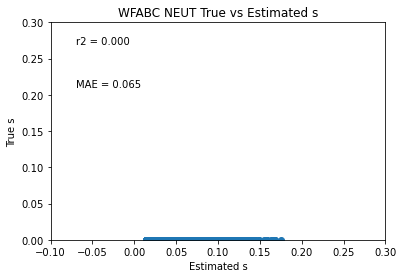

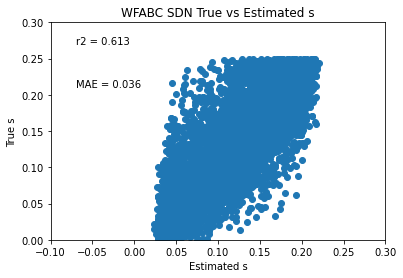

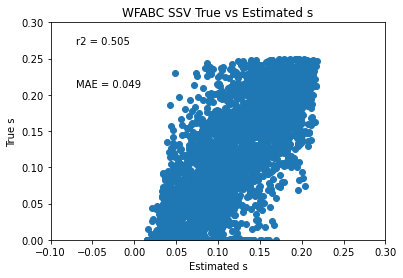

<Figure size 432x288 with 0 Axes>

In [3]:
colors = {"neut": "black", "sdn": "blue", "ssv": "red"}

for swp in df["sweep"].unique():
    subdf = df[df["sweep"] == swp].dropna()

    plt.scatter(x=subdf["estimated_s_mean"], y=subdf["s_val"])
    plt.xlim(-.1, .3)
    plt.ylim(0, .3)
    plt.annotate("r2 = {:.3f}".format(r2_score(subdf["s_val"], subdf["estimated_s_mean"])), (-0.07, 0.27))
    plt.annotate("MAE = {:.3f}".format(mean_absolute_error(subdf["s_val"], subdf[f"estimated_s_mean"])), (-0.07, 0.21))

    plt.title(f"WFABC {swp.upper()} True vs Estimated s") 
    plt.xlabel("Estimated s") 
    plt.ylabel("True s") 
    plt.savefig(f"{swp}_true_v_est_wfapp.pdf")
    plt.show()
    plt.clf()
